# Hands-On NLP
## Class 1

- Getting some data

- Understanding a text corpus

  - Unicode

  - Character distributions

- The notion of words

  - Word distributions

  - Types and tokens

  - Text complexity

Group members:
* Carlos Cuevas Villarmín
* Javier Alejandro Lopetegui González
* José Felipe Espinosa Orjuela

In [1]:
import re
import unicodedata
from collections import Counter
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm

In [2]:
tqdm.pandas()

nltk.download("punkt")

sns.set_style("darkgrid")
sns.set_context("notebook")

pd.set_option('display.precision', 2)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/javierlopetegui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
%config InlineBackend.figure_format="retina"  # For high DPI display

# %load_ext blackcellmagic

In [4]:
DATA = Path("./data")

TEXT_P = DATA / "texts"

CORPORA = [
    "mythology",
    "woodworking",
    "robotics",
    "hsm",
    "health",
    "portuguese",
]

EPS = np.finfo(float).eps

In [5]:
TEXT_P.mkdir(exist_ok=True)

# Getting some data

- If you have already downloaded the preprocessed "texts" folder, skip this, if not uncomment

- If you don't know how to use *git*, *conda* or *pip* inside of the notebook, learn it *now*

In [73]:
# !git clone https://github.com/EleutherAI/stackexchange_dataset/
# # %cd stackexchange_dataset
# # %pwd
# # !pip install -r requirements.txt

# !conda create -n honlp python=3.9
# !conda activate honlp
# !conda config --env --add channels conda-forge\n\n
# !conda update --all
# !conda install ipykernel pandas seaborn nltk ipywidgets
# !conda install bs4 lxml py7zr tqdm jsonlines zstandard ujson requests wget
# !pip install lm-dataformat
# !pip check

In [74]:
# !python stackexchange_dataset/main.py --names \
#     mythology.stackexchange,woodworking.stackexchange,woodworking.stackexchange,
#     robotics.stackexchange,hsm.stackexchange,health.stackexchange,
#     portuguese.stackexchange

In [6]:
corpora = {}
stats = []

for corpus in tqdm(CORPORA):
    print(corpus)
    texts = []
    for fp in (TEXT_P / corpus).glob("*.txt"):
        with fp.open() as f:
            texts.append(f.read())

    corpora[corpus] = "".join(texts)

    stats.append(
        {
            "corpus": corpus,
            "files_n": len(texts),
            "chars_n": len(corpora[corpus]),
        }
    )

df = pd.DataFrame.from_records(stats, index=["corpus"])
df["text"] = [corpora[corpus] for corpus in corpora]
df

  0%|          | 0/6 [00:00<?, ?it/s]

mythology
woodworking
robotics
hsm
health
portuguese


,files_n,chars_n,text
corpus,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n..."
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic..."


In [7]:
for corpus, text in corpora.items():
    print(f"*** {corpus} ***")
    print(text[:65])

*** mythology ***
Q:

Can anyone identify what Chinese mythology creature this is?

*** woodworking ***
Q:

Glue-up for butcher block-style countertop

Background
I am w
*** robotics ***
Q:

How is this torque value arrived?

I'm going through this per
*** hsm ***
Q:

When and why did people stopped using "natural philosophy" te
*** health ***
Q:

Help reading an eyeglass prescription: What does "PL" or "PC"
*** portuguese ***
Q:

Qual a origem da expressão "o fim da picada"?

Se, em geral, 


# Visualizing the corpus

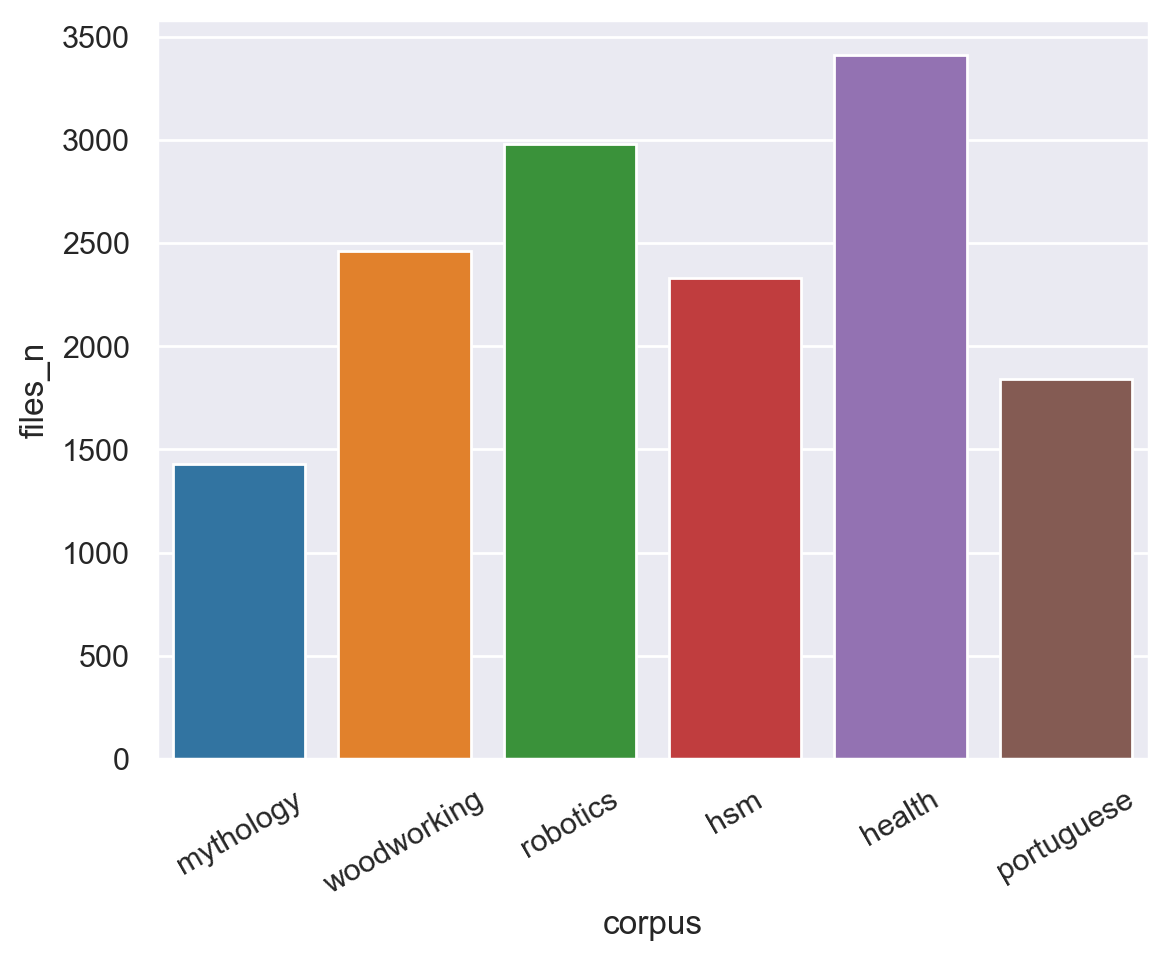

In [8]:
sns.barplot(x=df.index, y="files_n", data=df)
plt.xticks(rotation=30)
plt.show()

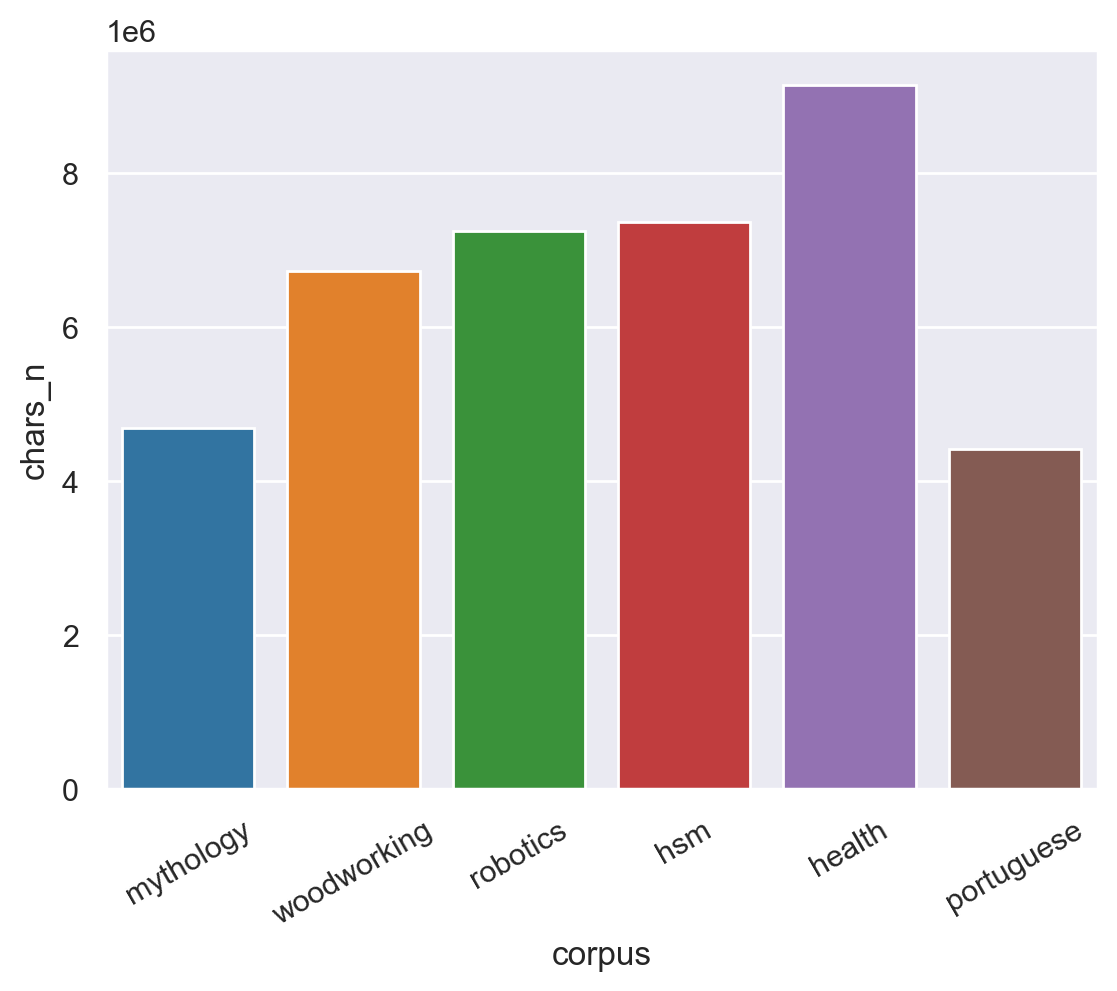

In [9]:
sns.barplot(x=df.index, y="chars_n", data=df)
plt.xticks(rotation=30)
plt.show()

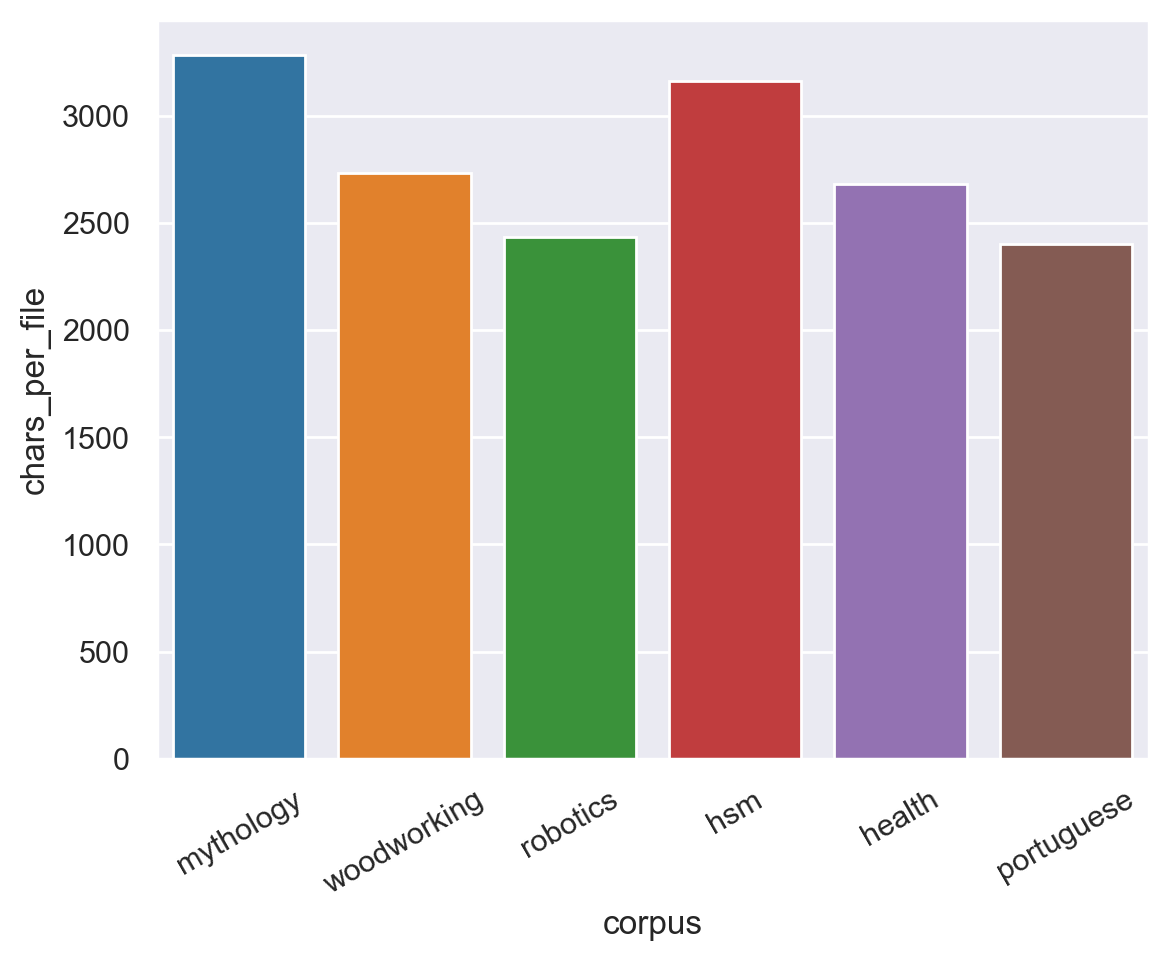

In [10]:
df["chars_per_file"] = df.chars_n / df.files_n
sns.barplot(x=df.index, y="chars_per_file", data=df)
plt.xticks(rotation=30)
plt.show()

In [11]:
char_counters = df.text.map(Counter)

print(char_counters.health)

Counter({' ': 1428190, 'e': 861733, 't': 632823, 'a': 565159, 'i': 546356, 'o': 544730, 'n': 497167, 's': 484696, 'r': 423945, 'h': 298661, 'l': 295594, 'c': 257405, 'd': 255072, 'u': 208547, 'm': 181309, 'f': 155592, 'p': 148135, 'y': 135782, 'g': 131592, 'b': 101865, '\n': 98068, 'w': 96347, '.': 83195, 'v': 80904, ',': 72317, 'k': 42048, 'I': 30666, '-': 25035, 'A': 23297, 'T': 22328, ':': 21092, '0': 20947, ')': 20097, '(': 19763, '1': 19457, 'x': 18488, 'S': 16075, '/': 15770, '2': 15348, 'C': 15331, "'": 14012, 'D': 12043, '?': 10573, 'H': 9790, 'M': 9623, 'P': 9573, '"': 9515, 'R': 8196, 'q': 7768, '3': 7653, '5': 7437, 'W': 7370, 'B': 7203, '9': 7147, 'O': 7116, 'E': 7058, 'N': 6760, 'F': 6620, 'z': 6278, 'j': 6113, '4': 5863, '6': 5305, '8': 4810, 'V': 4775, 'L': 4736, '7': 4692, 'Q': 3892, 'G': 3694, 'U': 3377, '%': 3032, ';': 2444, 'J': 2320, 'Y': 2267, 'K': 1731, ']': 1492, '[': 1490, '’': 1136, '–': 1121, '=': 1110, '_': 962, '&': 887, '“': 690, '”': 684, '!': 587, '+': 58

In [12]:
df["char_types_n"] = char_counters.map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


### Note:
- space
  - '\u200c' '\u200e' '\u3000' '\xa0' ???
- ascii
- other letters
  - diacritics: ĕ Ł
- other characters
  - other languages 茶 Ꝣ  ी が
  - symbols €
  - graphical symbols ■
  - emoji ✅ 🤗
- punctuation
  - , ! ≫ '\xad'


In [13]:
# new in 2021: ⃀ (Kyrgyzstani som)
#   (see also https://www.unicode.org/emoji/charts-14.0/emoji-released.html)

for ch in "ĕŁ茶Ꝣीが€,!≫■✅🤗\u200c":
    print(unicodedata.category(ch), ":::", unicodedata.name(ch))

Ll ::: LATIN SMALL LETTER E WITH BREVE
Lu ::: LATIN CAPITAL LETTER L WITH STROKE
Lo ::: CJK UNIFIED IDEOGRAPH-8336
Lu ::: LATIN CAPITAL LETTER VISIGOTHIC Z
Mc ::: DEVANAGARI VOWEL SIGN II
Lo ::: HIRAGANA LETTER GA
Sc ::: EURO SIGN
Po ::: COMMA
Po ::: EXCLAMATION MARK
Sm ::: MUCH GREATER-THAN
So ::: BLACK SQUARE
So ::: WHITE HEAVY CHECK MARK
So ::: HUGGING FACE
Cf ::: ZERO WIDTH NON-JOINER


In [14]:
myth_char_freq_df = pd.DataFrame.from_dict(
    char_counters.mythology, orient="index", columns=["freq"]
)
myth_char_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_char_freq_df.index.name = "char"
myth_char_freq_df

,freq
char,
,783629
e,447804
t,312204
a,287794
o,273780
...,...
抱,1
還,1
Ø,1


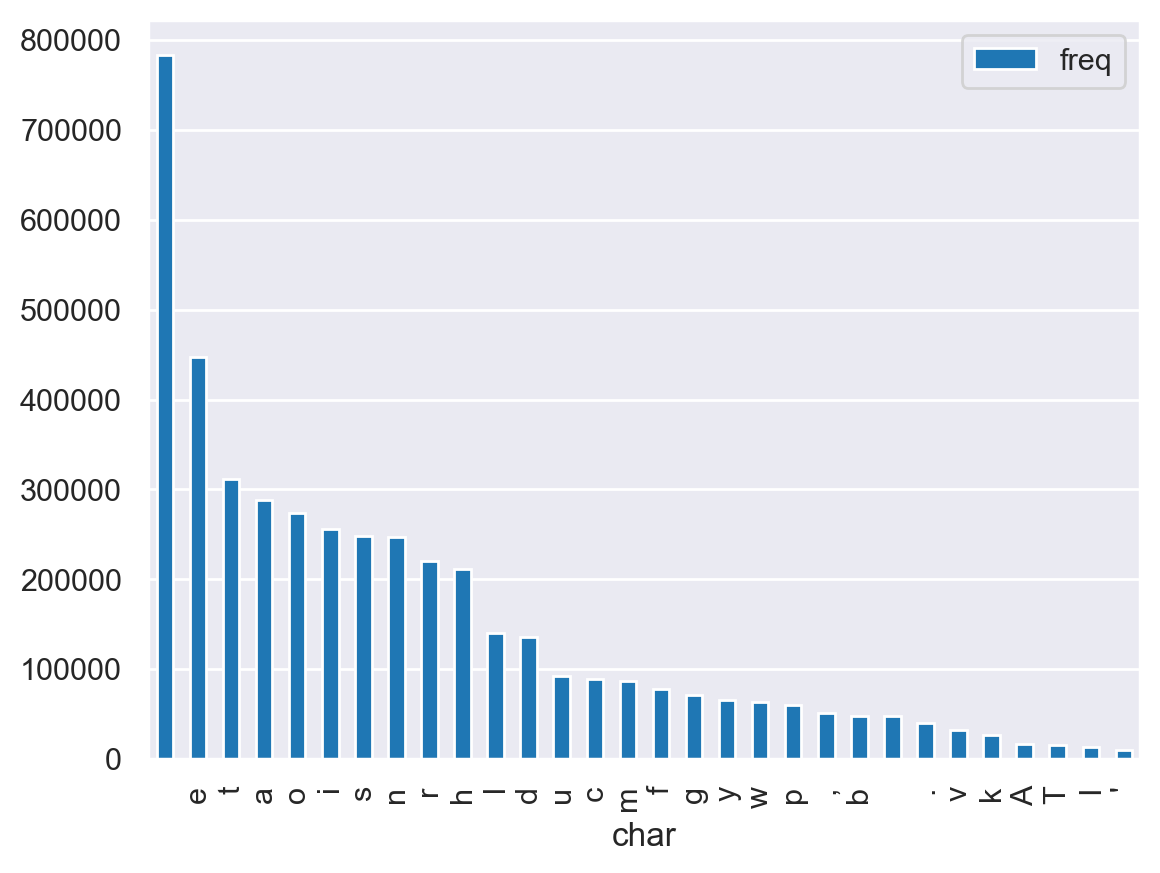

In [15]:
myth_char_freq_df.head(30).plot(kind="bar")
plt.grid(axis="x")
plt.show()

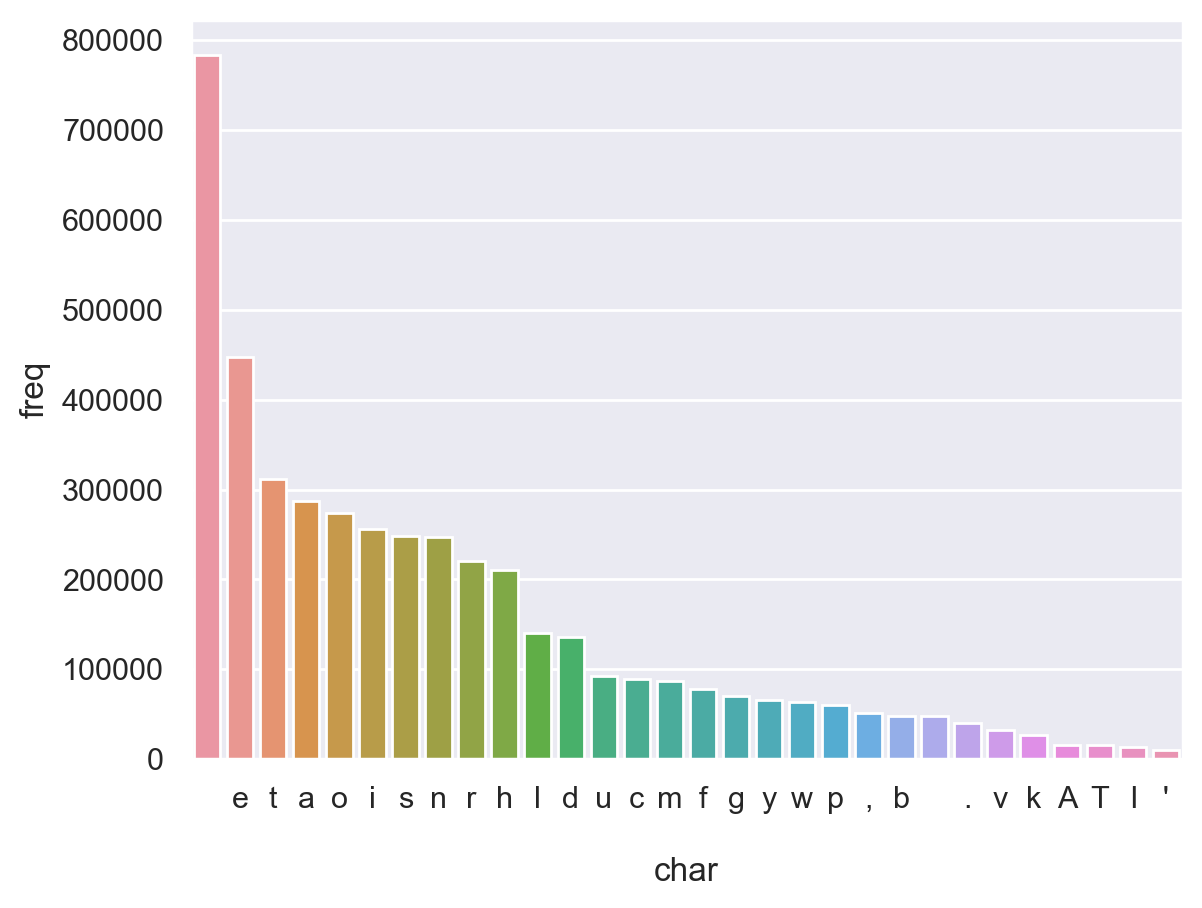

In [16]:
sns.barplot(
    x=myth_char_freq_df.head(30).index,
    y="freq",
    data=myth_char_freq_df.head(30),
)
plt.show()

/Users/javierlopetegui/miniforge3/envs/honlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


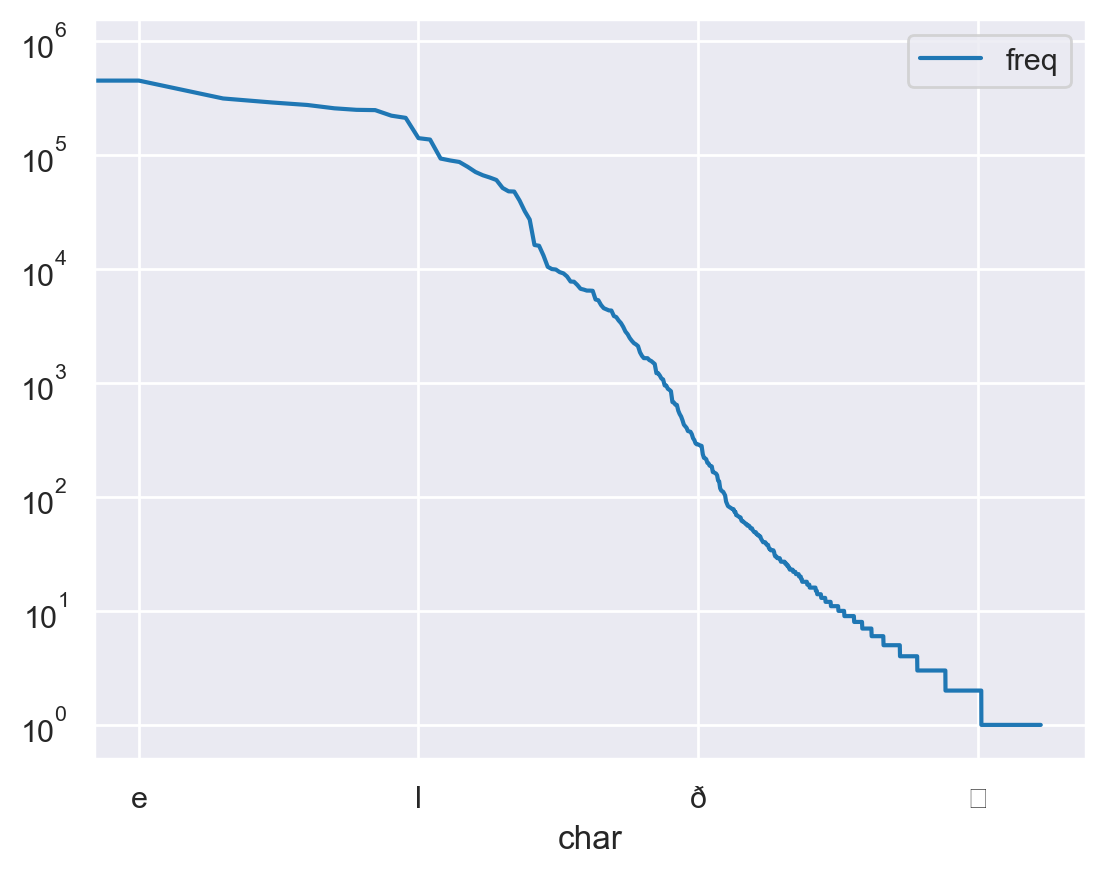

In [17]:
myth_char_freq_df.plot(loglog=True)
plt.show()

In [18]:
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


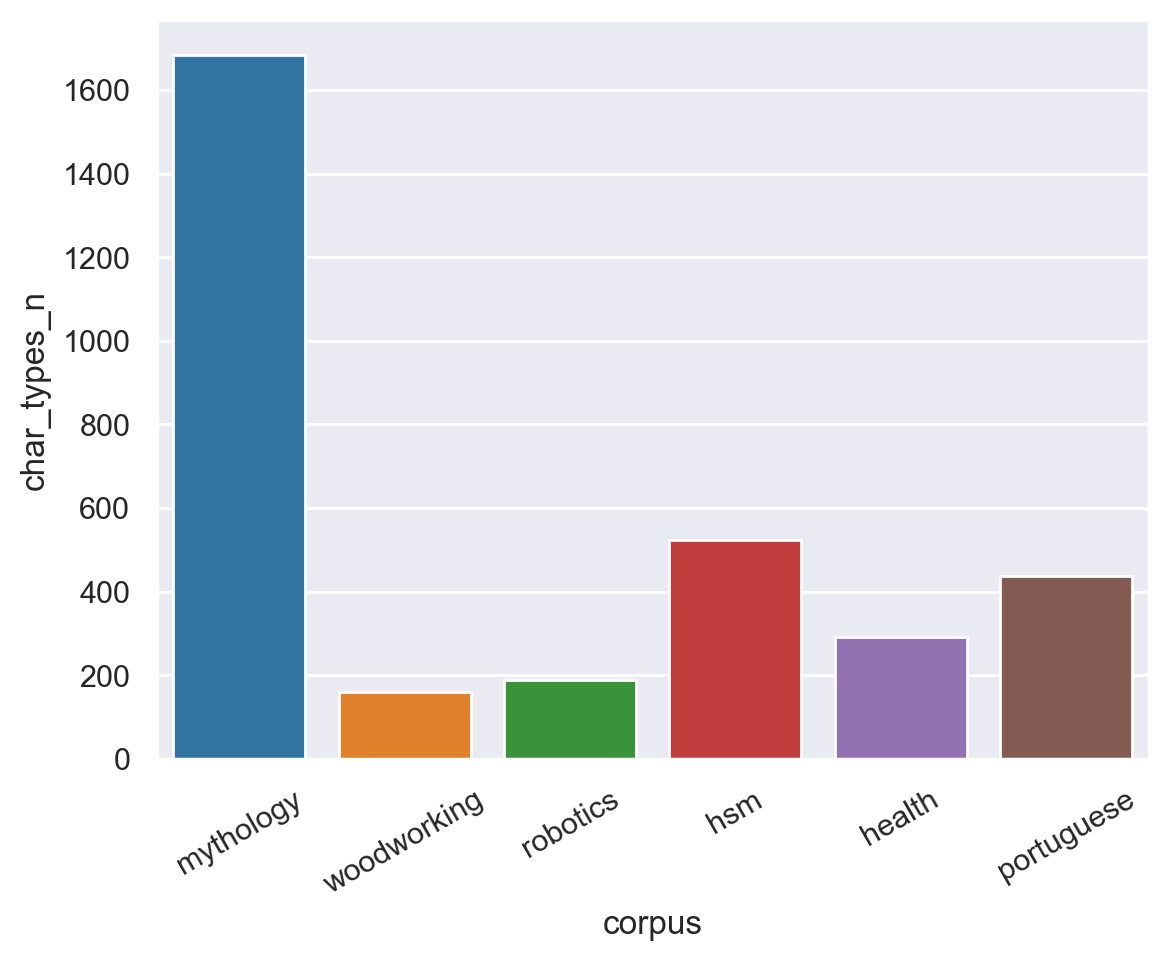

In [19]:
sns.barplot(x=df.index, y="char_types_n", data=df)
plt.xticks(rotation=30)
plt.show()

#### how to compute richness in characters?

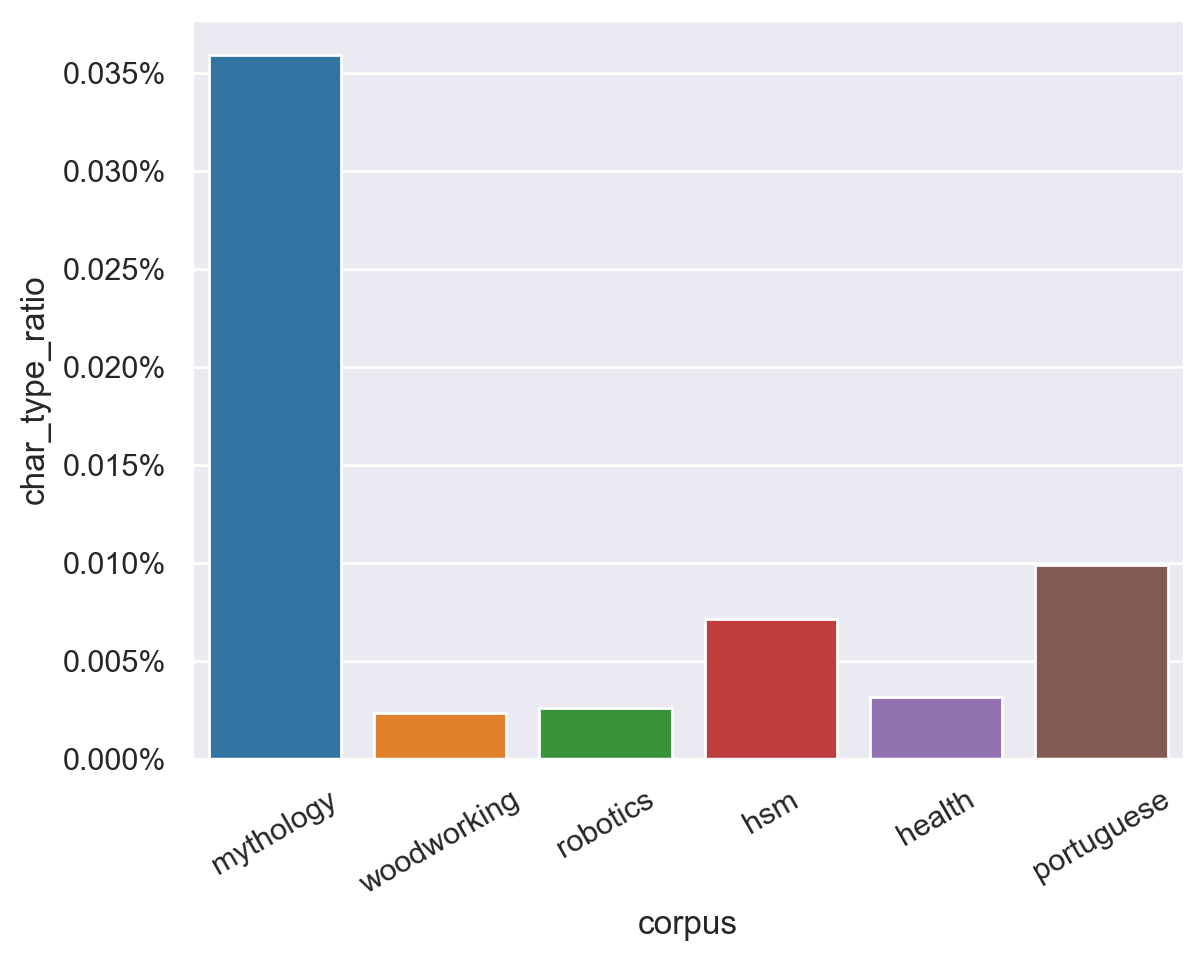

In [20]:
df["char_type_ratio"] = df.char_types_n / df.chars_n
ax = sns.barplot(x=df.index, y="char_type_ratio", data=df)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=3))
plt.xticks(rotation=30)
plt.show()

In [21]:
char_counters = df.text.map(lambda x: Counter(x[:1000]))
print(char_counters.health)
df["type_chars_1000"] = char_counters.map(len)

Counter({' ': 151, 'e': 80, 'i': 67, 't': 66, 'o': 64, 'a': 57, 'n': 54, 's': 49, 'r': 48, 'l': 33, 'h': 29, 'c': 27, 'f': 23, '\n': 22, 'd': 22, 'g': 21, 'y': 18, 'u': 17, 'p': 13, 'm': 13, 'b': 10, '.': 9, 'w': 8, ':': 6, '9': 6, 'P': 5, 'S': 5, 'v': 5, ',': 5, '"': 4, '(': 4, ')': 4, 'T': 4, '0': 4, '1': 4, 'W': 3, 'L': 3, 'I': 3, 'A': 3, '-': 3, 'k': 3, '7': 3, 'Q': 2, 'H': 2, 'C': 2, '?': 2, "'": 2, 'R': 2, 'E': 2, 'O': 1, 'Y': 1, 'M': 1, '“': 1, '‘': 1, '’': 1, '”': 1, 'B': 1})


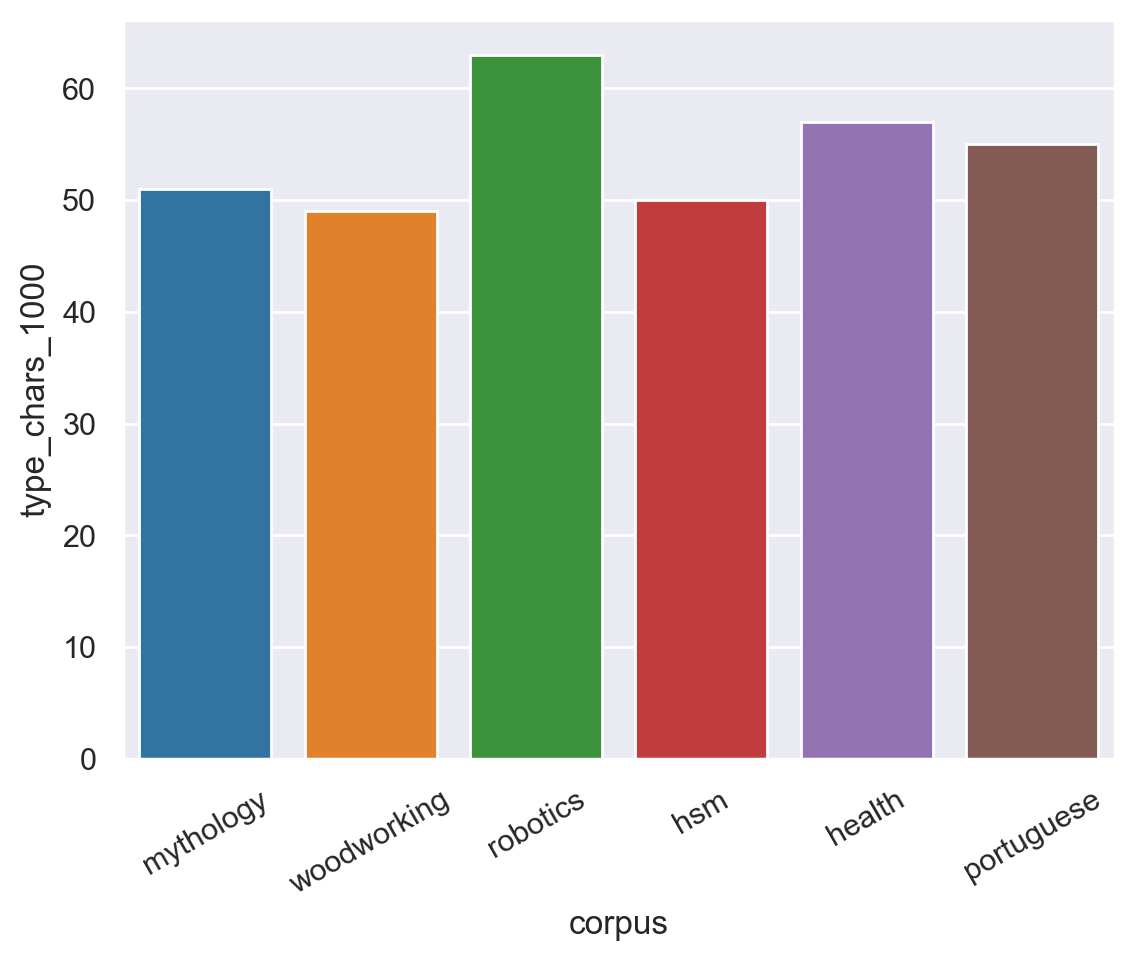

In [22]:
sns.barplot(x=df.index, y="type_chars_1000", data=df)
plt.xticks(rotation=30)
plt.show()

### What's going on here? Which text is the richest in characters?

In [23]:
HOP = 100_000

In [24]:
def batch_counts(text, max_len, hop):
    counters = [Counter()]
    for i in range(hop, max_len, hop):
        counters.append(counters[-1] + Counter(text[i - hop : i]))
    return [len(cntr) for cntr in counters]

In [25]:
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000
corpus,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55


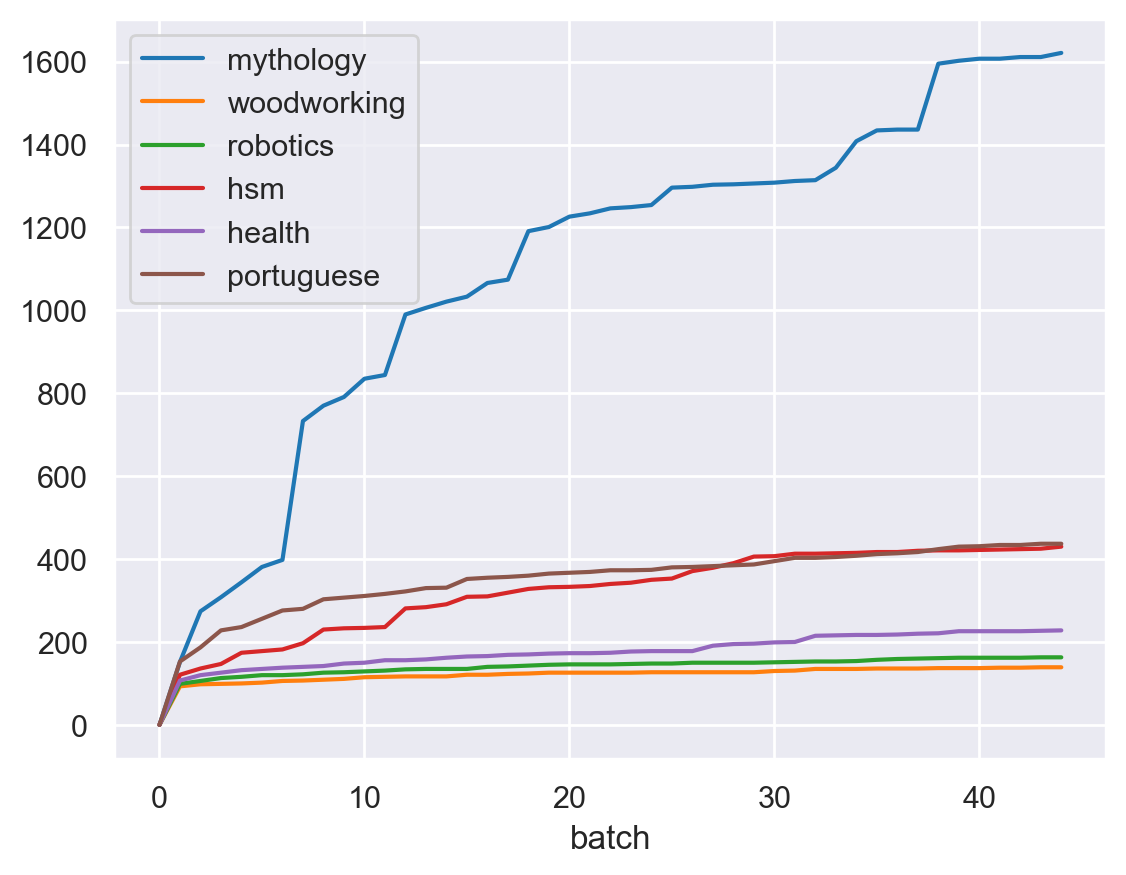

In [27]:
batch_counters = df.text.map(
    lambda x: batch_counts(x, max_len=df.chars_n.min(), hop=HOP)
)

batch_counters_df = pd.DataFrame(
    dict(zip(batch_counters.index, batch_counters.values))
)
batch_counters_df.index.name = "batch"

batch_counters_df.plot()
plt.show()

### What's happening here?

#### 🚧 TODO
As we increase the batch, i.e. the size of the text, the difference in characters increases considerably only in mythology. That is, the characters are significantly enriched with the increase of the sample. On the contrary, in all other cases, the characters used in the text do not increase as the text size increases. We can conclude that, except in the case of mythology, with small texts we cover mostly all the characters used in each corpus. It can be due the high number of very specific characters in this kind of texts representing wierd concepts about mythology.

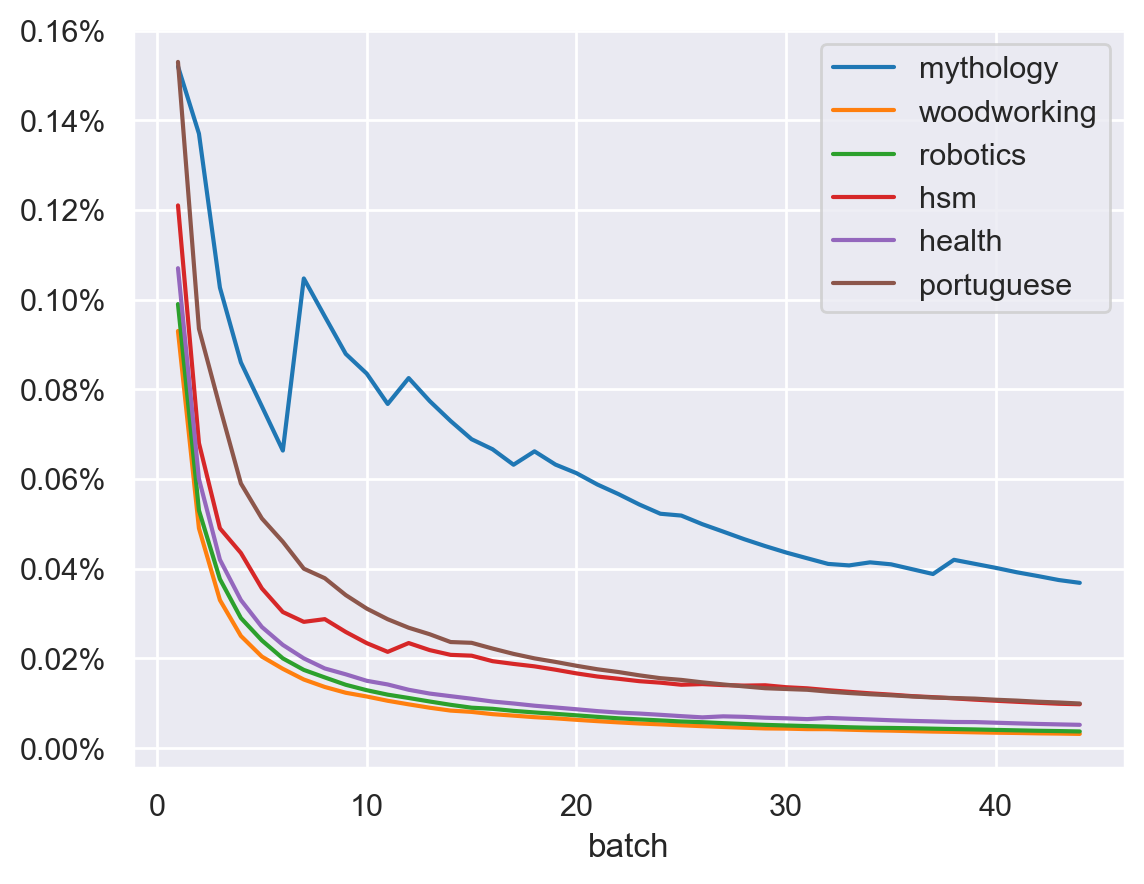

In [191]:
batches = np.arange(0, df.chars_n.min(), HOP)
batch_counters_freq_df = batch_counters_df.divide(batches, axis="index")
ax = batch_counters_freq_df.plot()
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=2))
plt.show()

This plot illustrates the same idea from another point of view. As the number of batches considered increased the proportion of unique characters decrease considerably at the beginning. This is because while the number of batches increases the number of unique characters achieves similar values.

# Tokens and words

### tokenizing

In [28]:
text = "Let's all together defeat last years' problem, SARS-CoV-2, in 2023!"
token_splits = text.split()

print("|".join(token_splits))
len(token_splits)

Let's|all|together|defeat|last|years'|problem,|SARS-CoV-2,|in|2023!


10

In [29]:
chars_re = re.compile(r"\W+")
token_splits = chars_re.split(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS|CoV|2|in|2023|


14

In [30]:
char_or_hyphen_re = re.compile(r"[\w-]+")
token_splits = char_or_hyphen_re.findall(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS-CoV-2|in|2023


11

Idiosyncratic rules for English!

- Think of *viens-tu*, *où va-t-il*, *Kaffeetasse*, *我爱你*...

- Can you think of other cases in your language where the tokenizer does not work? What does the tokenizer do?

### Using a specialized class: `nltk`

In [31]:
nltk_tokens = word_tokenize(text)

print("|".join(nltk_tokens))
len(nltk_tokens)

Let|'s|all|together|defeat|last|years|'|problem|,|SARS-CoV-2|,|in|2023|!


15

### Not bad. Does it work for Portuguese?

In [32]:
pt_tokens = word_tokenize(corpora["portuguese"][:333])

print("|".join(pt_tokens))
len(pt_tokens)

Q|:|Qual|a|origem|da|expressão|``|o|fim|da|picada|''|?|Se|,|em|geral|,|``|picada|''|é|uma|coisa|negativa|,|pois|remete|a|dor|e|coceira|,|como|pode|ser|que|``|o|fim|da|picada|''|seja|uma|expressão|também|negativa|?|A|:|Picada|(|Aulete|,|3|)|é|também|“|caminho|aberto|em|mata|fechada|a|golpes|de|facão|ou|foice|”|.|E|a|minha|interpretação|foi|sempre|que|o|f


83

Watch out: do = de + o

In [33]:
toks = [
    word_tokenize(text[:1_000_000]) for corpus, text in tqdm(corpora.items())
]

  0%|          | 0/6 [00:00<?, ?it/s]

In [34]:
tokens_fp = DATA / "tokens.pkl"
try:
    tokens = pd.read_pickle(tokens_fp)
except FileNotFoundError:
    tokens = df.text.progress_map(word_tokenize)
    tokens.to_pickle(tokens_fp)

In [35]:
df["tokens"] = tokens
df["tokens_n"] = df.tokens.map(len)
df["types_n"] = df.tokens.map(set).map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,types_n
corpus,,,,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51,"[Q, :, Can, anyone, identify, what, Chinese, m...",942599,51253
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390532,32318
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63,"[Q, :, How, is, this, torque, value, arrived, ...",1526904,53833
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50,"[Q, :, When, and, why, did, people, stopped, u...",1445136,62464
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57,"[Q, :, Help, reading, an, eyeglass, prescripti...",1714931,66006
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55,"[Q, :, Qual, a, origem, da, expressão, ``, o, ...",907242,60282


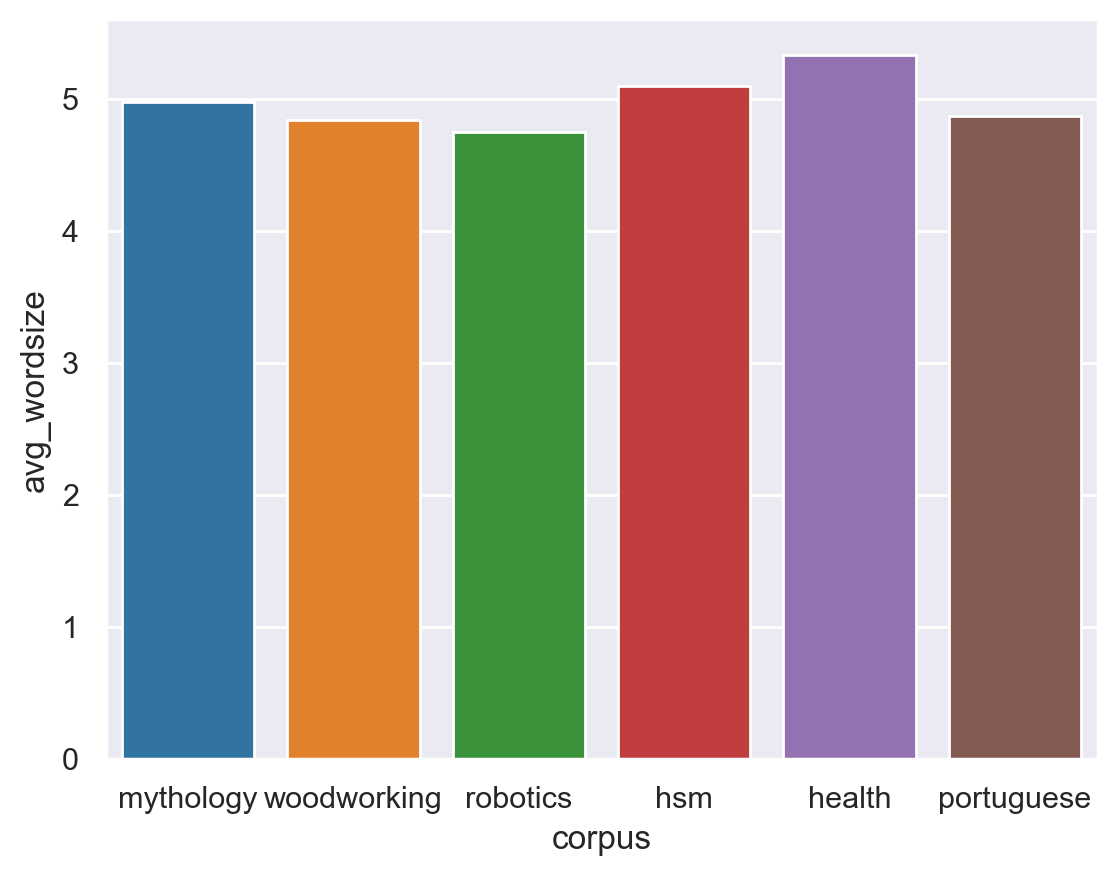

In [36]:
df["avg_wordsize"] = df.chars_n / df.tokens_n
sns.barplot(x=df.index, y="avg_wordsize", data=df)
plt.show()

In [37]:
word_ctr = Counter(df.tokens.mythology)
myth_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
myth_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_tok_freq_df.index.name = "token"
myth_tok_freq_df.head()

,freq
token,
the,51133
",",51118
.,33172
of,29559
and,21018


In [38]:
word_ctr = Counter(df.tokens.woodworking)
wood_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
wood_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
wood_tok_freq_df.index.name = "token"
wood_tok_freq_df.head()

,freq
token,
the,65222
.,52197
",",41321
to,38592
a,37003


### Frequency of word length

#### 🚧 TODO

- Give the average length of tokens per corpus - clearly define what average you measure!

- Give the longest word per corpus and give their length

In [43]:
def avg_len_tokens(toks, mode = 0):
    '''
    Function to calculate the average length of tokens in a list of tokens
    Args:
        toks: list of tokens
        mode: 0 for all tokens, 1 for unique tokens
    Returns:
        Average length of tokens in the list toks
    '''
    if mode != 0:
        toks = set(toks)
    
    return sum([len(token) for token in toks])/len(toks)


def max_len_tokens(toks):
    '''
    Function to calculate the maximum length of a token in a list of tokens
    Args:
        toks: list of tokens
    Returns:    
        Maximum length of tokens in the list toks
    '''
    return max([len(token) for token in toks])


def longest_words(toks):
    '''
    Function to calculate the longest word in a list of tokens
    Args:
        toks: list of tokens
    Returns:
        Longest word in the list toks
    '''
    return max(toks, key=len)

In [44]:
print("\n*** average length in the dictionary considering repeated tokens (on types) ***")
display(tokens.map(avg_len_tokens))
print("\n*** average length in the dictionary considering unique tokens (on types) ***")
display(tokens.map(lambda x: avg_len_tokens(x, 1)))


*** average length in the dictionary considering repeated tokens (on types) ***


corpus
mythology      4.10
woodworking    3.94
robotics       3.89
hsm            4.26
health         4.45
portuguese     4.04
dtype: float64


*** average length in the dictionary considering unique tokens (on types) ***


corpus
mythology       7.72
woodworking     8.26
robotics        9.03
hsm             8.25
health         10.03
portuguese      7.98
dtype: float64

In [45]:
print("\n*** the longest words' length ***")
display(tokens.map(max_len_tokens))

print("\n*** the longest words ***")
display(tokens.map(longest_words))


*** the longest words' length ***


corpus
mythology      305
woodworking    137
robotics       199
hsm            178
health         265
portuguese     125
dtype: int64


*** the longest words ***


corpus
mythology      亮乃北行見備，備與亮非舊，又以其年少，以諸生意待之。坐集既畢，眾賓皆去，而亮獨留，備亦不問其...
woodworking    //www.hafele.com/us/en/products/furniture-kitc...
robotics       //helgewurdemann.files.wordpress.com/2014/10/e...
hsm            //www.quora.com/What-are-the-ways-to-understan...
health         //www.researchgate.net/profile/Secil_Vural/pub...
portuguese     //educacao.uol.com.br/disciplinas/cultura-bras...
dtype: object

#### We can try to remove all non-ascii characters to get to actual long words

In [128]:
wood_tok_freq_df["len"] = wood_tok_freq_df.index.str.len()
wood_tok_filtered_df = wood_tok_freq_df[
    ~wood_tok_freq_df.index.str.contains(r"[0-9/=+\._-]")
]
wood_tok_filtered_df.sort_values(by="len", ascending=False).head(10)

,freq,len
token,,
halfdovetaillapjoints,1,21
GraphussupportsMonica,1,21
AloysiusDefenestrate,1,20
CrazyRussianWoodShop,1,20
curiouslysatisfying,1,19
CanadianWoodworking,1,19
oversimplification,3,18
GreatPlanesTrading,1,18
characteristically,1,18


- Yay! we found "disproportionately"!

#### 🚧 TODO: Let's process all corpora to get their word length distribution

In [73]:
tokens

corpus
mythology      [Q, :, Can, anyone, identify, what, Chinese, m...
woodworking    [Q, :, Glue-up, for, butcher, block-style, cou...
robotics       [Q, :, How, is, this, torque, value, arrived, ...
hsm            [Q, :, When, and, why, did, people, stopped, u...
health         [Q, :, Help, reading, an, eyeglass, prescripti...
portuguese     [Q, :, Qual, a, origem, da, expressão, ``, o, ...
Name: text, dtype: object

In [77]:
def len_freq_counter(text):
    '''
    Function to calculate the frequency of words of a certain length in a text
    Args:
        text: text to be analyzed
    Returns:
        Counter with the frequency of lengths of words in the text
    '''
    len_freq = Counter()
    for token in text:
        len_freq[len(token)] += 1
    
    return pd.Series(len_freq)

len_freq_df = tokens.map(len_freq_counter)

In [78]:
len_freq_df.mythology

1      153309
3      166898
6       67226
8       40900
4      134176
        ...  
105         1
305         1
72          1
63          2
103         1
Length: 99, dtype: int64

#### 🚧 TODO: Let's plot the mythology word length distribution

In [79]:
myth_len_freqs = len_freq_df.mythology.sort_values(ascending=False)
myth_len_freqs.head(5)

3    166898
2    153910
1    153309
4    134176
5     94334
dtype: int64

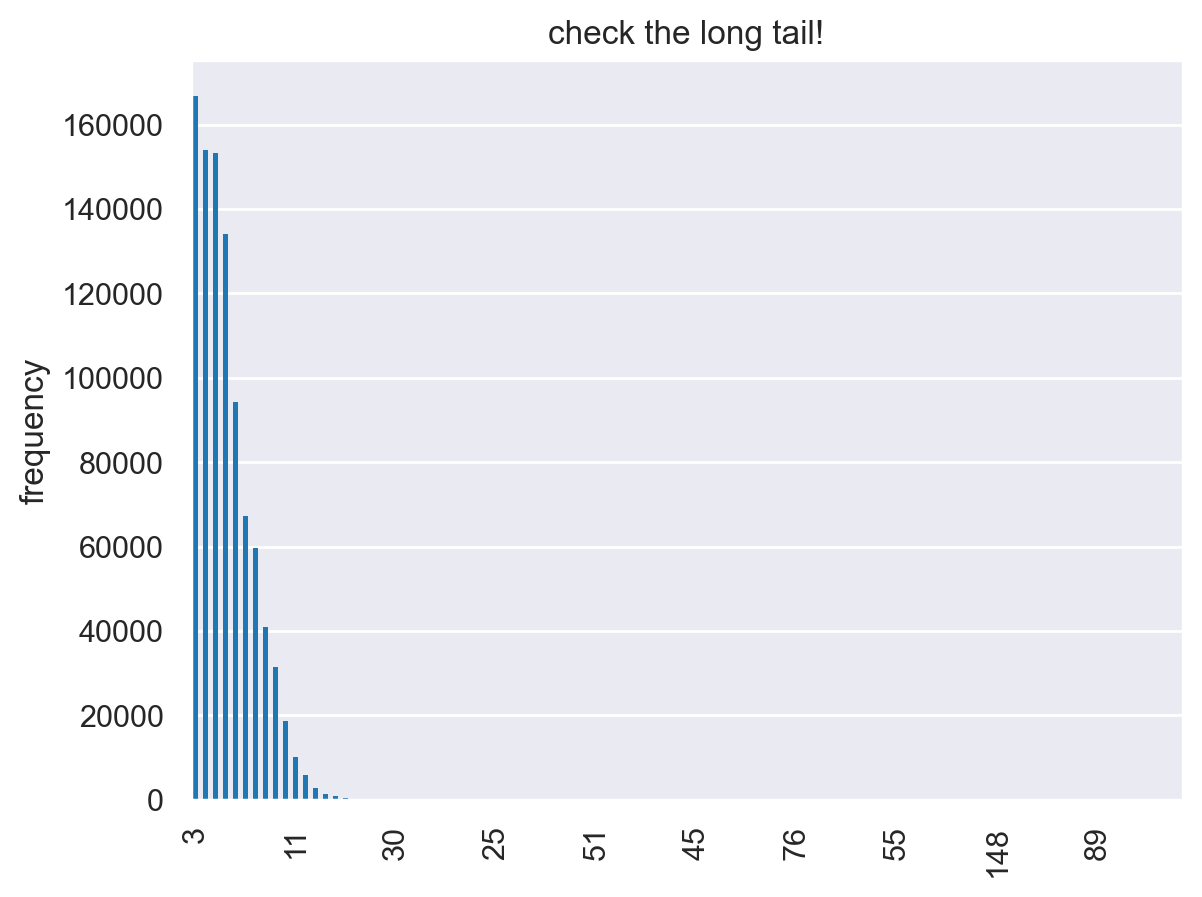

In [80]:
ax = myth_len_freqs.plot.bar(title="check the long tail!", linewidth=0)

# Print only 1 x-tick-label out of 10
for i, label in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        label.set_visible(False)

plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

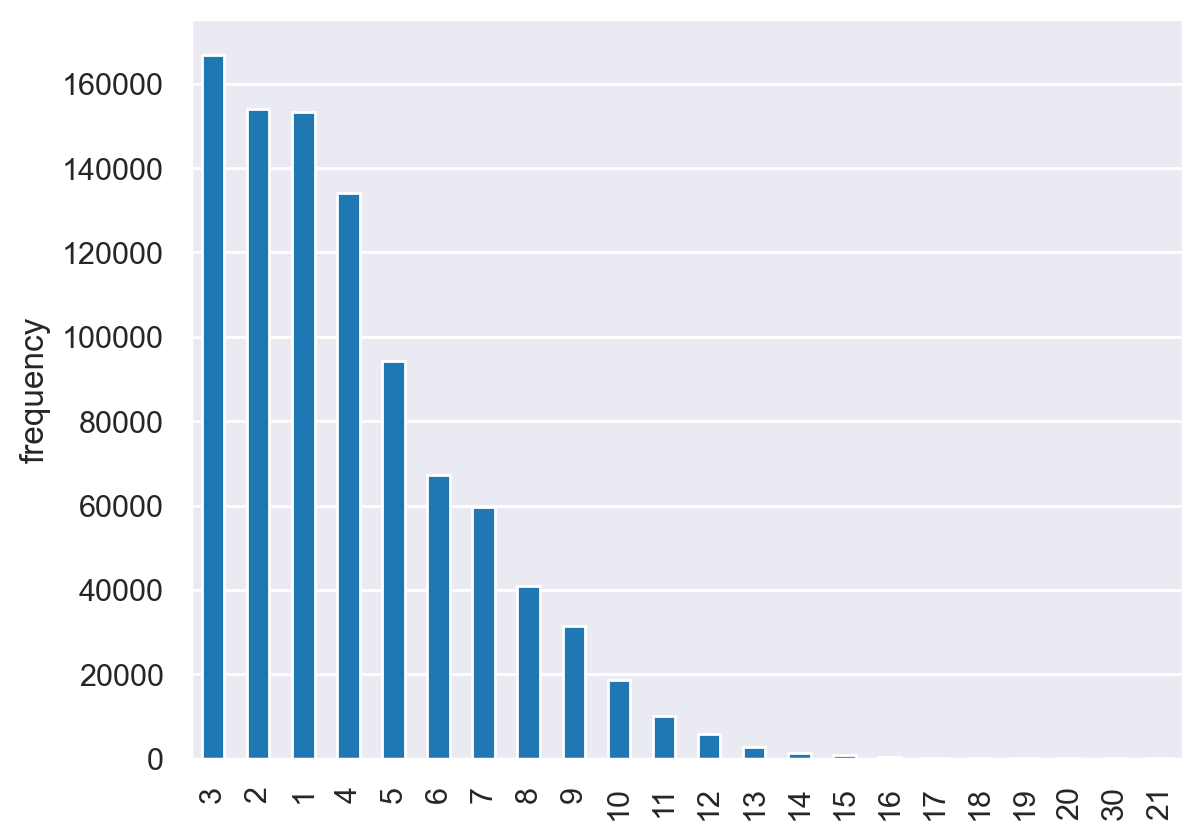

3    166898
2    153910
1    153309
4    134176
5     94334
dtype: int64

In [81]:
myth_len_freqs.head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

myth_len_freqs.head(5)

- If you order by token length you get a nice curve, something close to the hypergeometric distribution:

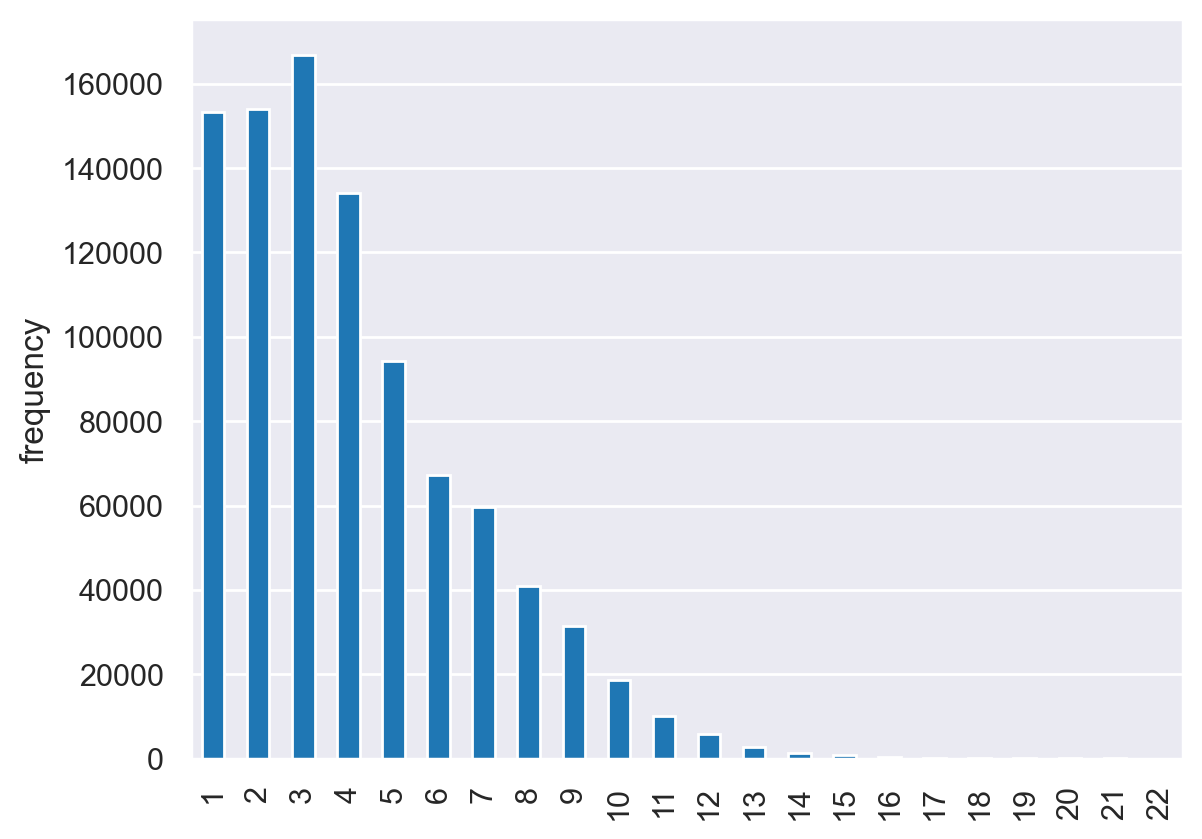

In [92]:
# here we ordered by the index of the series (the length of the tokens)
len_freq_df.mythology.sort_index(ascending=True).head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

# 💥 Let's Zipf token frequencies!

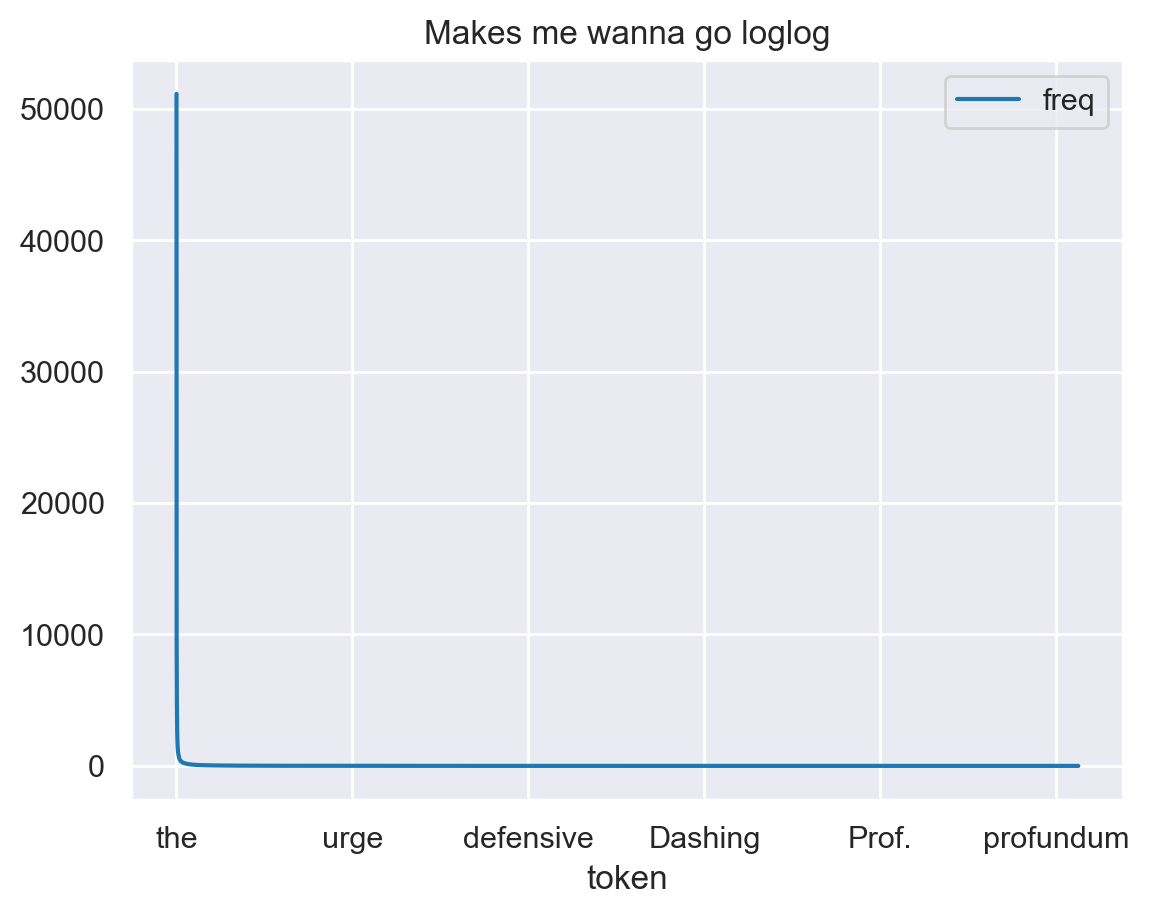

In [85]:
myth_tok_freq_df.plot(title="Makes me wanna go loglog")
plt.show()

In [94]:
myth_char_freq_df

,freq
char,
,783629
e,447804
t,312204
a,287794
o,273780
...,...
抱,1
還,1
Ø,1


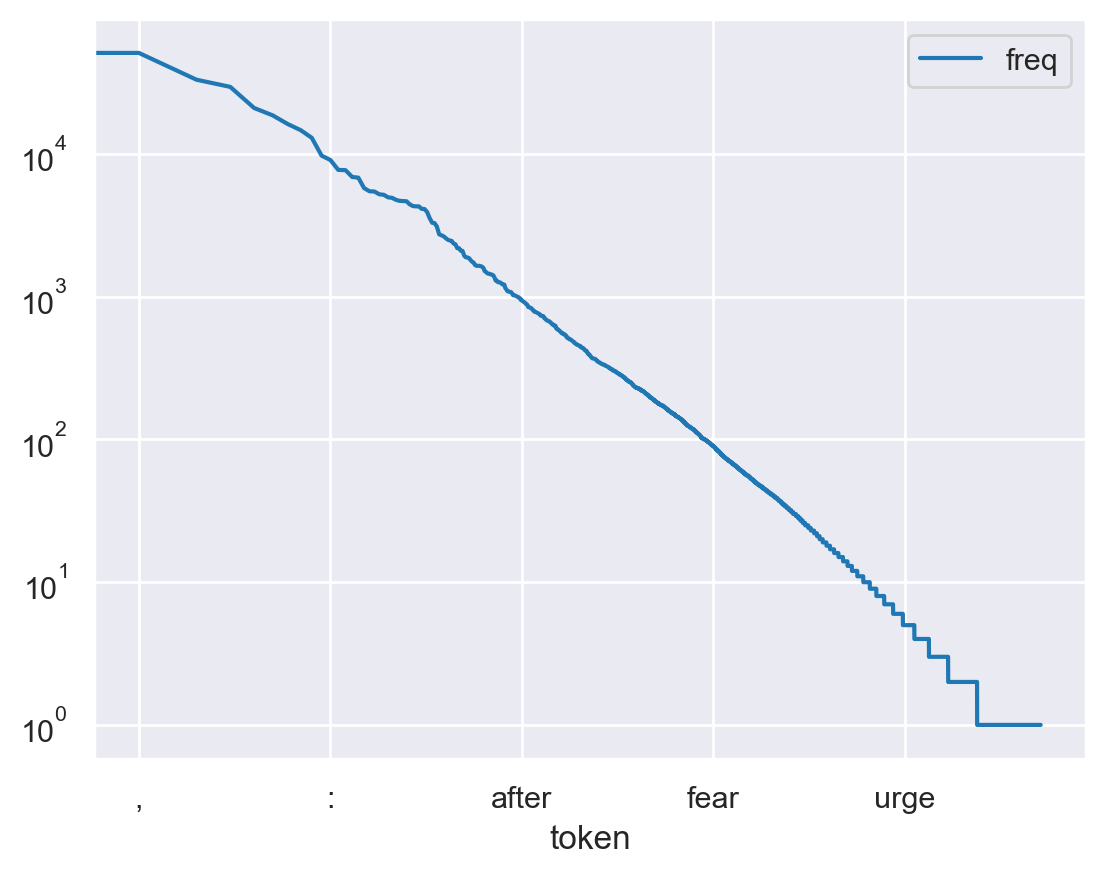

In [86]:
myth_tok_freq_df.plot(loglog=True)
plt.show()

In [164]:
# len_freq_df.woodworking.sort_values(ascending=False).plot(loglog=True, style=".")
# plt.ylabel("frequency")
# plt.show()

### Wow! How straight is that!

- Explain why there are: `,: after fear Z?`

We can explain the appearance of these tokens in the x-axis by understanding how common they are in the language. The tokens in x-axis are ordered from more common to less. The first one we can see is the ',' what makes sense as it is a really common token, then we have the token ':' which is less common but still widely used as a punctuation sign. After these punctuation signs it makes sense to have a word like 'after' which is a preposition as this kind of words are used really often, despite the content of the text. After that we have 'fear' which is a noun and of course it is supposed to be less common that the previous considered tokens.

#### 🚧 TODO: Now let's process the length distribution for every corpus

In [117]:
all_tokens = []
for corpus in tokens.index:
    all_tokens.extend(tokens[corpus])

In [166]:
all_ctr = Counter(all_tokens)
all_token_freqs_df = pd.DataFrame.from_dict(
    all_ctr, orient="index", columns=["freq"]
)
all_token_freqs_df.head()

,freq
Q,14843
:,87665
Can,1500
anyone,1162
identify,368


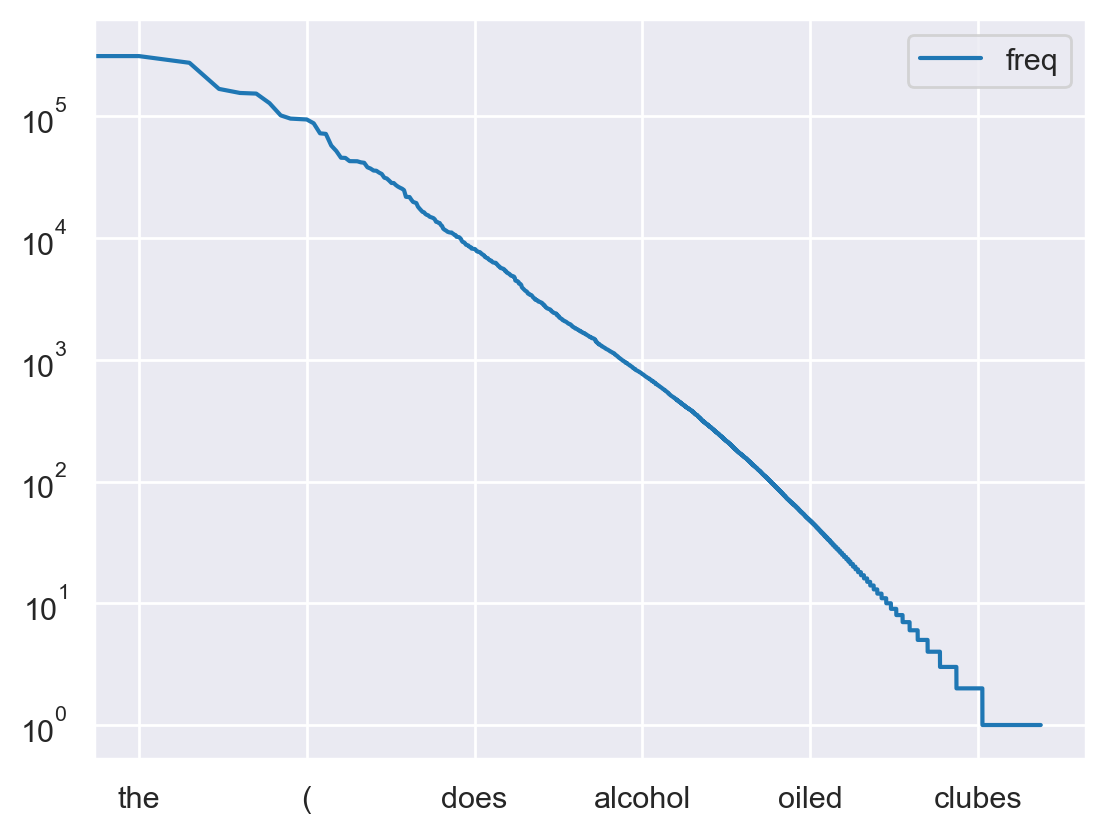

In [170]:
all_token_freqs_df.sort_values(by = 'freq', ascending = False).plot(loglog = True)
plt.show()

As we can see, the distribution of the tokens considering all the corpus still follows the same expected Zipf's law. 

#### 🚧 TODO: Do length frequency follow Zipf's law?

Explain the graph results below and possibly fix them

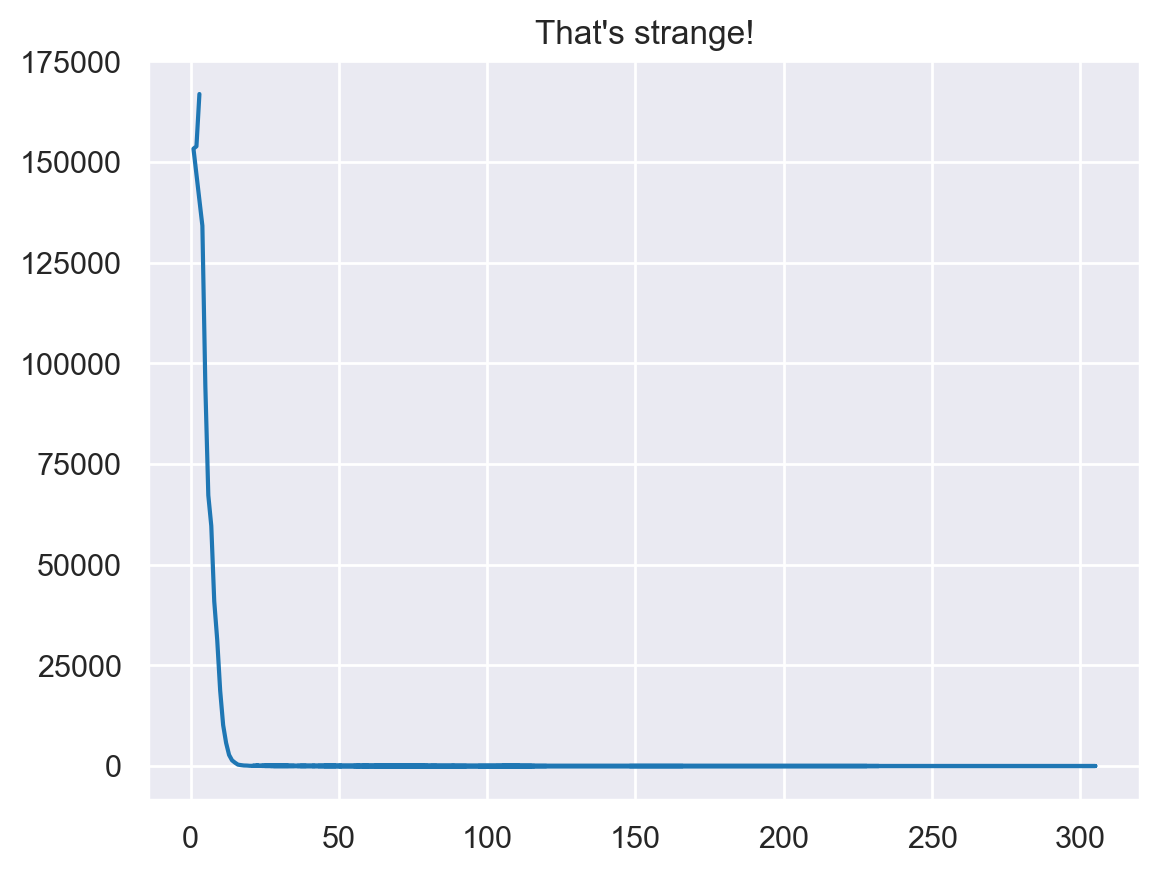

In [98]:
myth_len_freqs = len_freq_df.mythology.sort_values(ascending=False)

myth_len_freqs.plot(title="That's strange!")
plt.show()

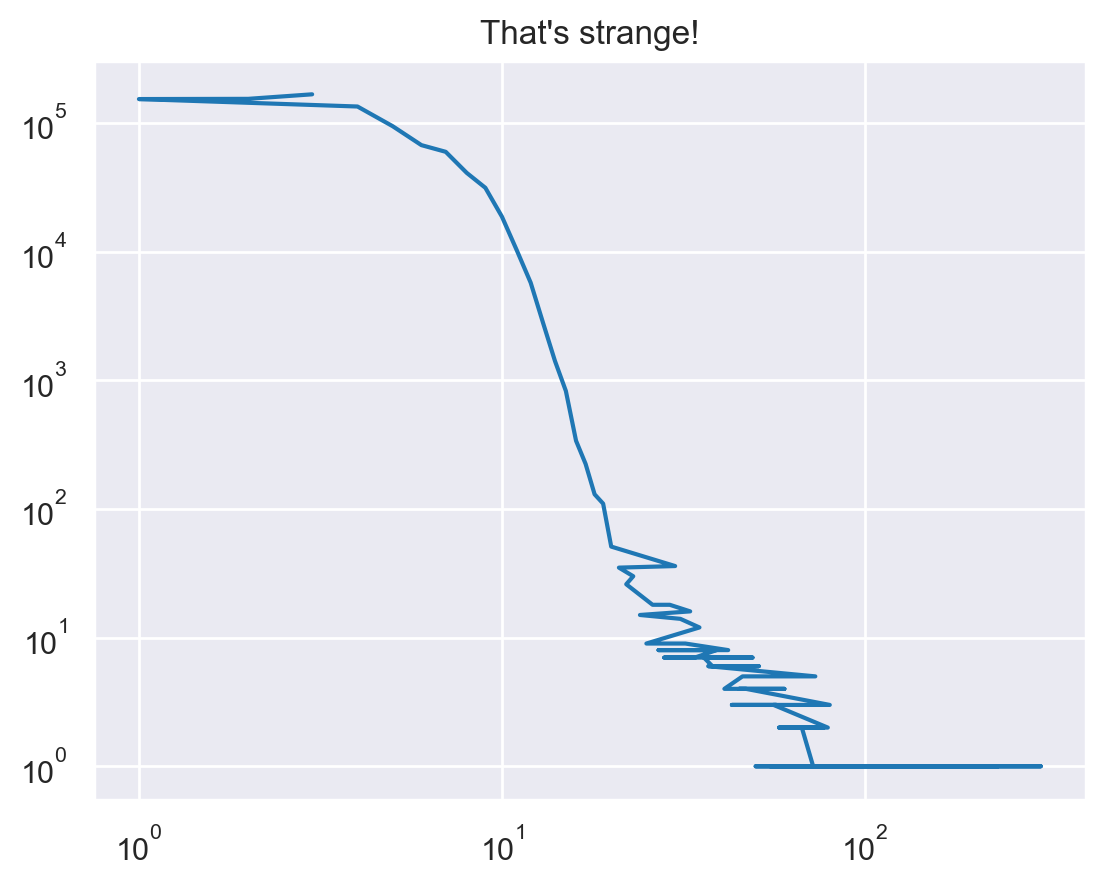

In [99]:
myth_len_freqs.plot(title="That's strange!", loglog=True)
plt.show()

In [193]:
def median_len_toks(toks):
    '''
    Function to calculate the median length of tokens in a list of tokens
    Args:
        toks: list of tokens
    Returns:
        Median length of tokens in the list toks
    '''
    return np.median([len(token) for token in toks])

In [195]:
def percentil_len_toks(toks, perc=0.75):
    '''
    Function to calculate the percentile length of tokens in a list of tokens
    Args:
        toks: list of tokens
        perc: percentile to be calculated
    Returns:
        Percentile length of tokens in the list toks
    '''
    return np.percentile([len(token) for token in toks], perc*100)


In [197]:
print("\n*** the median for lenghts of tokens in each corpus ***")
display(tokens.map(median_len_toks))


*** the median for lenghts of tokens in each corpus ***


corpus
mythology      3.0
woodworking    3.0
robotics       3.0
hsm            3.0
health         4.0
portuguese     3.0
dtype: float64

In [198]:
print("\n*** the 0.75 percentil for lenghts of tokens in each corpus ***")
display(tokens.map(percentil_len_toks))


*** the 0.75 percentil for lenghts of tokens in each corpus ***


corpus
mythology      6.0
woodworking    5.0
robotics       5.0
hsm            6.0
health         6.0
portuguese     6.0
dtype: float64

First we would like to remeber what does it mean for a distribution to follow a Zipf's law. It means that as n increase, the value of the distribution is inversely proportional to the value of n in logaritmique scale. In this case we do not have that for the lenght frequency distribution. 

#### 🚧 TODO: How to compute richness in words? How to compute the type/token ratio? Who will win this time?

In [178]:
df[['types_n', 'tokens_n']]

,types_n,tokens_n
corpus,,
mythology,51253,942599
woodworking,32318,1390532
robotics,53833,1526904
hsm,62464,1445136
health,66006,1714931
portuguese,60282,907242


In [171]:
df["token_type_ratio"] = df.types_n / df.tokens_n
df["token_type_ratio"]

corpus
mythology      0.05
woodworking    0.02
robotics       0.04
hsm            0.04
health         0.04
portuguese     0.07
Name: token_type_ratio, dtype: float64

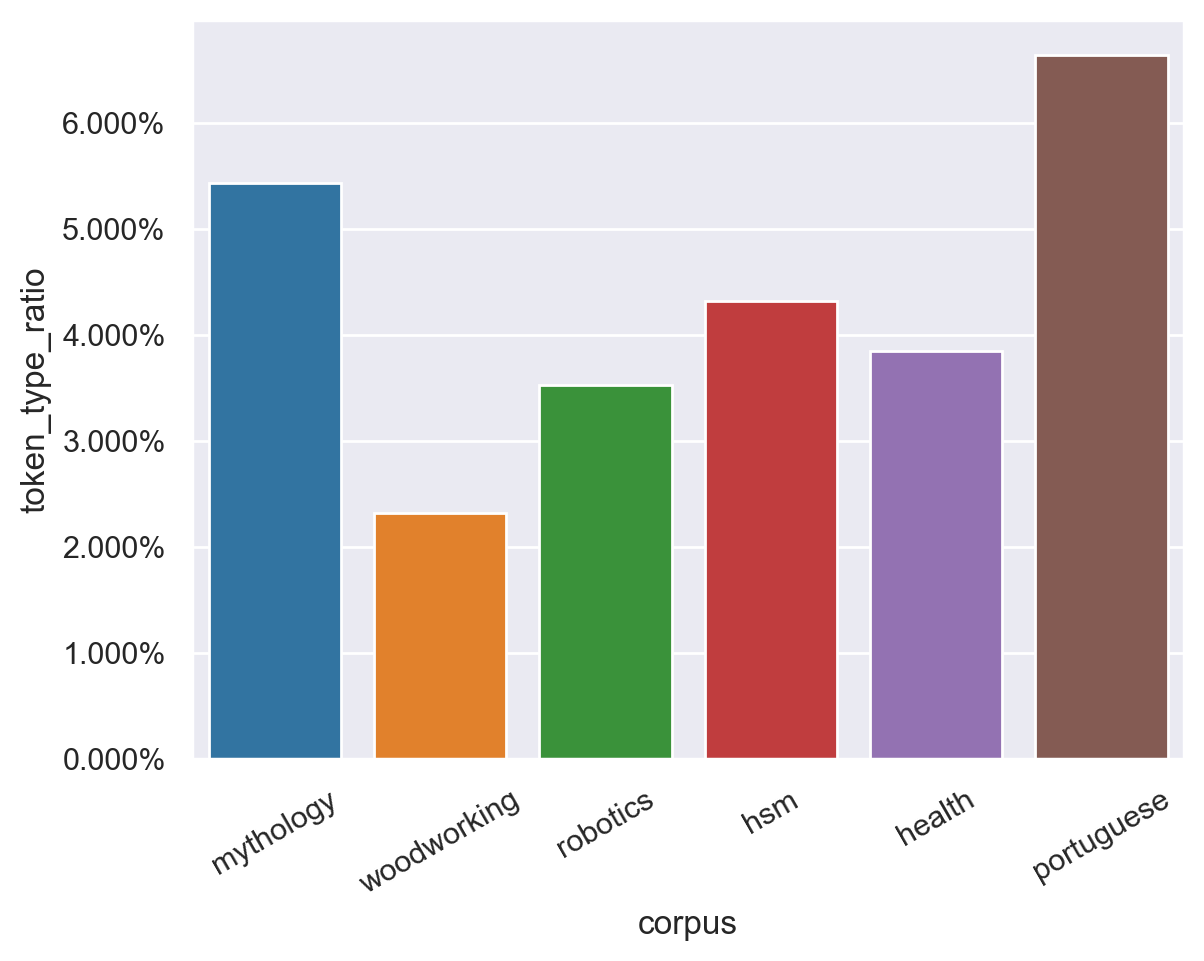

In [179]:
ax = sns.barplot(x=df.index, y="token_type_ratio", data=df)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=3))
plt.xticks(rotation=30)
plt.show()

### What happened to Portuguese? Explain!

Make a type/token ration growth plot. Explain the obtained order!

In this case the ratio of unique tokens is the highest for portuguese corpus. Despite that for the characters type ratio it was not as high as mythology corpus, we have that in terms of tokens diversity this corpus is the richest. It suggests that even when the ratio of unique characters is not very high the combination of them enriches the variability of tokens more than in other corpus. Then, to have a high ratio of unique chars does not imply directly that the variability of token's ratio will be high too.

In [175]:
word_types = df.tokens.progress_map(
    lambda x: batch_counts(x, max_len=df.tokens_n.min(), hop=10_000)
)

  0%|          | 0/6 [00:00<?, ?it/s]

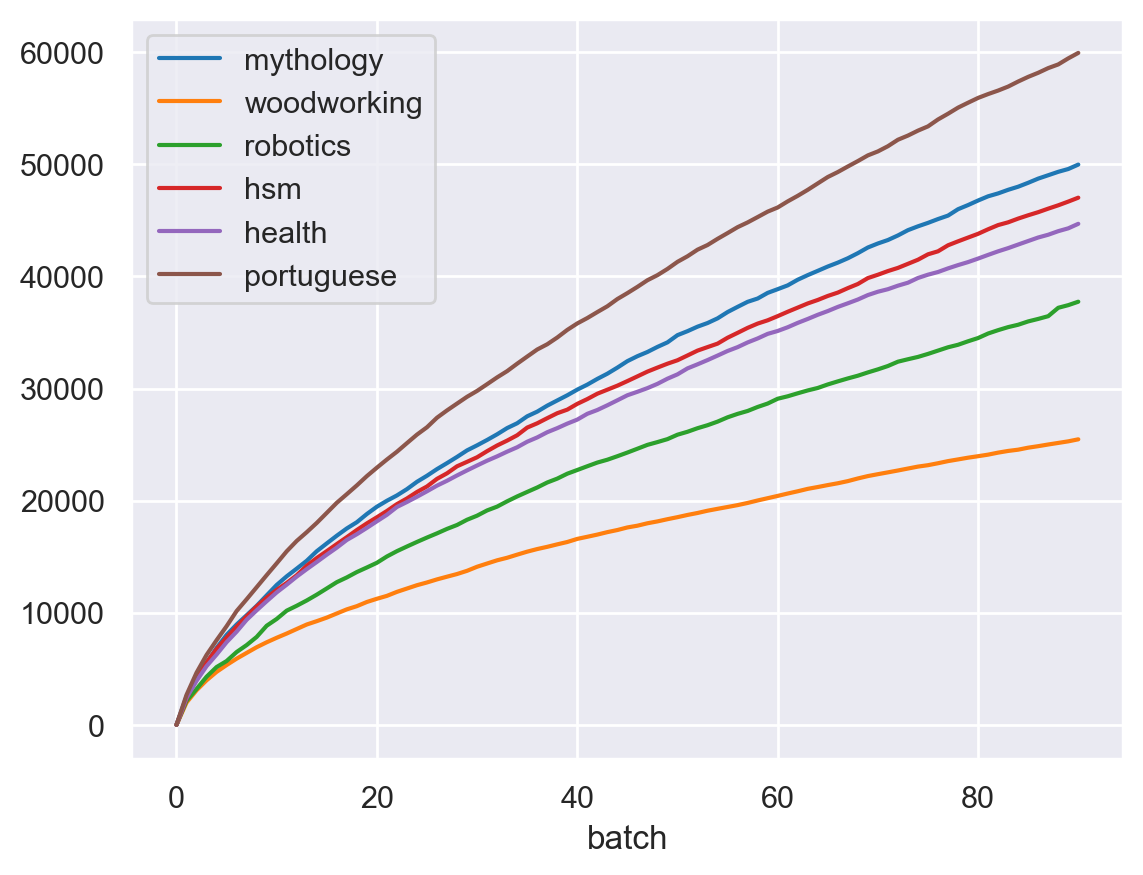

,mythology,woodworking,robotics,hsm,health,portuguese
batch,,,,,,
0,0,0,0,0,0,0
1,2534,1985,2140,2330,2403,2673
2,4169,3085,3200,4259,3923,4654
3,5532,3976,4295,5560,5236,6238
4,6860,4727,5157,6767,6273,7551
...,...,...,...,...,...,...
86,48720,24857,36206,45726,43468,58157
87,49021,25007,36451,46041,43714,58575
88,49325,25147,37199,46339,44032,58902


In [176]:
word_type_df = pd.DataFrame(dict(zip(word_types.index, word_types.values)))
word_type_df.index.name = "batch"
word_type_df.plot()
plt.show()

word_type_df

To have a better understanding of this graph we can compare it to the same one but for characters type ratio. In the case of characters for portuguese we had that we converged really fast to the maximum number of unique characters. Then, in this case, for tokens we can see how even when the number of unique characters does not increase, the variability in the number of unique tokens keeps growing while we increase the size of the text.

On the other hand, for mythology corpus we had that the number of unique characters increased considerably as we increased the size of text while in this case the evolution of tokens type ratio is similar to the rest of topics. It should be because of for that corpus we can have a lot of very specific characters that appears in just one token or a few of them and are not mixable at all.

### Percentage of new words

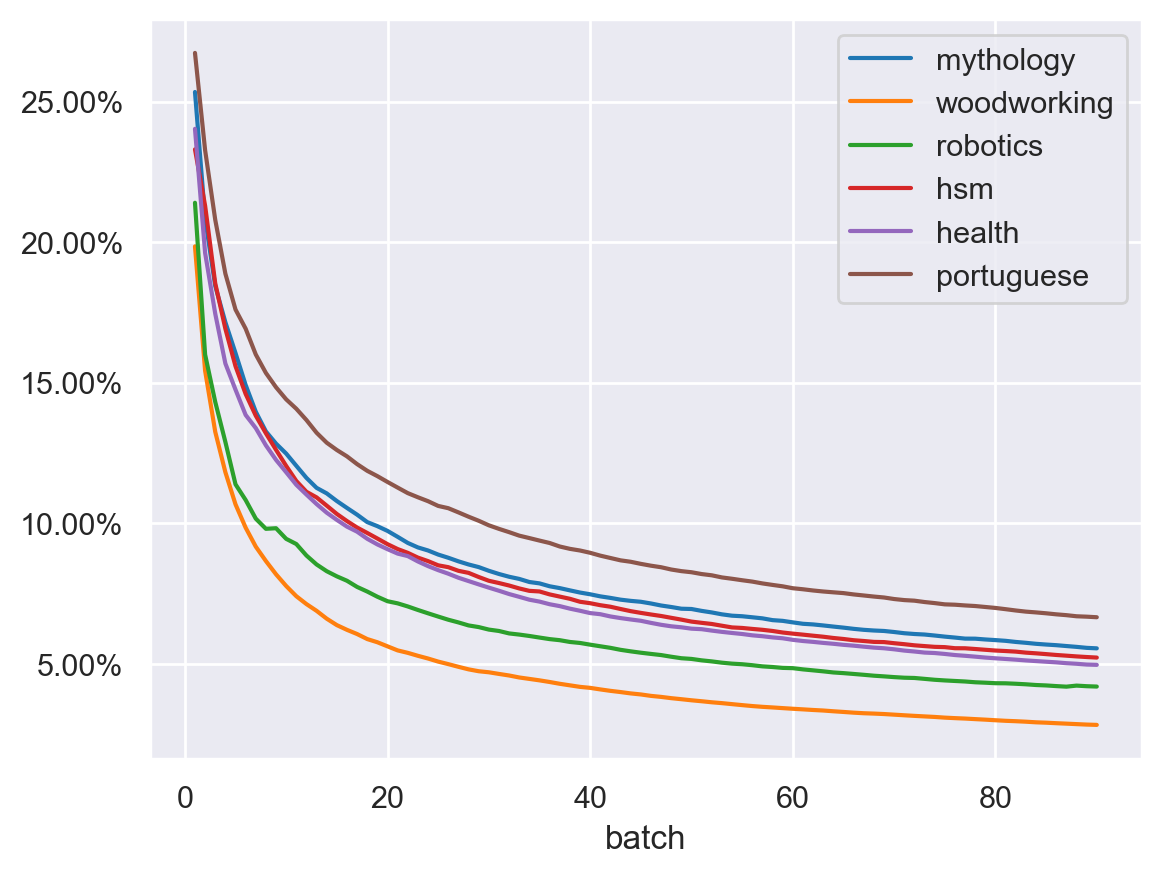

,mythology,woodworking,robotics,hsm,health,portuguese
batch,,,,,,
1,0.25,0.20,0.21,0.23,0.24,0.27
2,0.21,0.15,0.16,0.21,0.20,0.23
3,0.18,0.13,0.14,0.19,0.17,0.21
4,0.17,0.12,0.13,0.17,0.16,0.19
5,0.16,0.11,0.11,0.16,0.15,0.18
...,...,...,...,...,...,...
86,0.06,0.03,0.04,0.05,0.05,0.07
87,0.06,0.03,0.04,0.05,0.05,0.07
88,0.06,0.03,0.04,0.05,0.05,0.07


In [190]:
batches = np.arange(0, df.tokens_n.min(), 10_000)
word_type_token_df = word_type_df.divide(batches, axis="index")
ax = word_type_token_df.plot()
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=2))

# word_type_token_df.plot()
plt.show()

word_type_token_df[1:]

____